In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
#Reading the data

df = pd.read_csv('owid-covid-data.csv')

In [4]:
#Rows and Columns in the dataset

print(df.shape)

(299317, 67)


In [24]:
#Display all the data

pd.options.display.max_columns=67
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299312,ZWE,Africa,Zimbabwe,2023-03-25,264508.0,4.0,9.571,5679.0,0.0,0.286,16207.063,0.245,0.586,347.966,0.0,0.018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
299313,ZWE,Africa,Zimbabwe,2023-03-26,264509.0,1.0,8.714,5679.0,0.0,0.143,16207.124,0.061,0.534,347.966,0.0,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
299314,ZWE,Africa,Zimb

In [23]:
#Displaying first 5 rows

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [22]:
#Summary of data

df.describe(include='all')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,299317,285066,299317,299317,2.633540e+05,2.906040e+05,2.893400e+05,2.432290e+05,290686.000000,289456.000000,263354.000000,290604.000000,289340.000000,243229.000000,290686.000000,289456.000000,184817.000000,34601.000000,34601.000000,34948.000000,34948.000000,9023.000000,9023.000000,21168.000000,21168.000000,7.938700e+04,7.540300e+04,79387.000000,75403.000000,1.039650e+05,103965.000000,95927.000000,9.434800e+04,106788,7.319900e+04,7.008300e+04,6.780400e+04,4.200600e+04,6.023700e+04,1.622720e+05,73199.000000,70083.00000,67804.000000,42006.000000,162272.000000,1.623210e+05,162321.000000,193194.000000,253955.000000,236208.000000,227951.000000,233838.000000,231488.000000,149095.000000,231892.000000,243717.000000,173978.000000,171608.000000,113531.000000,204719.000000,275214.000000,224794.000000,2.993170e+05,1.029500e+04,10295.000000,10295.000000,10295.000000
unique,255,6,255,1190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,Africa,Argentina,2022-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1190,67391,1190,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.423132e+06,1.110653e+04,1.115202e+04,7.821417e+04,98.990467,99.381680,82882.753718,167.451019,168.125742,785.938076,1.050978,1.054993,0.911495,724.620618,17.255647,4251.001660,143.482805,378.747645,11.478145,4590.465892,93.049452,2.110457e+07,6.728541e+04,924.254762,3.272466,1.421784e+05,2.826309,0.098163,2.403633e+03,NaN,3.599293e+08,1.610384e+08,1.424784e+08,8.628828e+07,8.609587e+05,3.358504e+05,112.772537,50.33910,45.450884,31.990916,2169.922032,1.241798e+05,0.088006,43.498419,412.444211,30.516799,8.704599,5.502113,19029.391905,13.836857,264.251638,8.561240,10.798113,32.913356,50.798359,3.098147,73.721734,0.722569,1.284176e+08,4.727286e+04,9.535368,12.996518,1453.830857
std,NaN,NaN,NaN,NaN,3.405955e+07,1.048646e+05,1.022032e+05,4.058042e+05,610.463653,600.953399,133002.421636,1147.575425,646.271440,1033.880973,4.760732,2.962307,0.399925,

In [25]:
#Dropping some columns

df.drop(['new_cases_smoothed',
         'new_deaths_smoothed',
         'new_cases_per_million',
         'total_cases_per_million'],
        axis = 1, inplace = True)

In [26]:
df.shape

(299317, 63)

In [27]:
#Renaming columns

df.rename(columns = {
    'iso_code' : 'ISO_code',
    'continent' : 'Continent',
    'location' : 'Country',
    'date' : 'Date'
}, inplace = True)

df.head()

,ISO_code,Continent,Country,Date,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [28]:
#Listing the continent names

continent_list = list(df.Continent.unique())
continent_list

['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America', 'South America']

In [41]:
#Replacing missing values with a constant
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df), 
                   columns = df.columns)
df2

,ISO_code,Continent,Country,Date,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,missing_value,0.0,missing_value,0.0,missing_value,missing_value,0.0,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,54.422,18.6,2.581,1.337,1803.987,missing_value,597.029,9.59,missing_value,missing_value,37.746,0.5,64.83,0.511,41128772.0,missing_value,missing_value,missing_value,missing_value
1,AFG,Asia,Afghanistan,2020-01-04,missing_value,0.0,missing_value,0.0,missing_value,missing_value,0.0,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,54.422,18.6,2.581,1.337,1803.987,missing_value,597.029,9.59,missing_value,missing_value,37.746,0.5,64.83,0.511,41128772.0,missing_value,missing_value,missing_value,missing_value
2,AFG,Asia,Afghanistan,2020-01-05,missing_value,0.0,missing_value,0.0,missing_value,missing_value,0.0,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,54.422,18.6,2.581,1.337,1803.987,missing_value,597.029,9.59,missing_value,missing_value,37.746,0.5,64.83,0.511,41128772.0,missing_value,missing_value,missing_value,missing_value
3,AFG,Asia,Afghanistan,2020-01-06,missing_value,0.0,missing_value,0.0,missing_value,missing_value,0.0,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missin

In [53]:
#Grouping data

df3 = df2.groupby(['Date','Country',])[['total_cases','total_deaths','total_vaccinations']].sum().reset_index()
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,missing_value,missing_value,missing_value
4,2020-01-03,Afghanistan,missing_value,missing_value,missing_value
...,...,...,...,...,...
299312,2023-04-04,South Korea,missing_value,missing_value,missing_value
299313,2023-04-04,Sweden,missing_value,missing_value,missing_value
299314,2023-04-04,Upper middle income,missing_value,missing_value,5408280642.0
299315,2023-04-04,Uruguay,missing_value,missing_value,9011643.0


In [55]:
#Replacing missing values with 0 in total_cases column

df3['total_cases'].replace({'missing_value':0}, inplace = True)
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,missing_value,missing_value
1,2020-01-01,Mexico,0.0,missing_value,missing_value
2,2020-01-02,Argentina,0.0,missing_value,missing_value
3,2020-01-02,Mexico,0.0,missing_value,missing_value
4,2020-01-03,Afghanistan,0.0,missing_value,missing_value
...,...,...,...,...,...
299312,2023-04-04,South Korea,0.0,missing_value,missing_value
299313,2023-04-04,Sweden,0.0,missing_value,missing_value
299314,2023-04-04,Upper middle income,0.0,missing_value,5408280642.0
299315,2023-04-04,Uruguay,0.0,missing_value,9011643.0


In [57]:
#Replacing missing values in total_deaths and total_vaccinations

df3['total_deaths'].replace({'missing_value':0}, inplace = True)
df3['total_vaccinations'].replace({'missing_value':0}, inplace = True)
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,0.0,0.000000e+00
1,2020-01-01,Mexico,0.0,0.0,0.000000e+00
2,2020-01-02,Argentina,0.0,0.0,0.000000e+00
3,2020-01-02,Mexico,0.0,0.0,0.000000e+00
4,2020-01-03,Afghanistan,0.0,0.0,0.000000e+00
...,...,...,...,...,...
299312,2023-04-04,South Korea,0.0,0.0,0.000000e+00
299313,2023-04-04,Sweden,0.0,0.0,0.000000e+00
299314,2023-04-04,Upper middle income,0.0,0.0,5.408281e+09
299315,2023-04-04,Uruguay,0.0,0.0,9.011643e+06


In [58]:
#Plotting subset of specific data

df4 = df3[df3['total_deaths']>1000000]
countries = df4['Country'].unique()
print(countries)

['World' 'High income' 'Upper middle income' 'Europe' 'South America'
 'Asia' 'Lower middle income' 'North America' 'European Union'
 'United States']


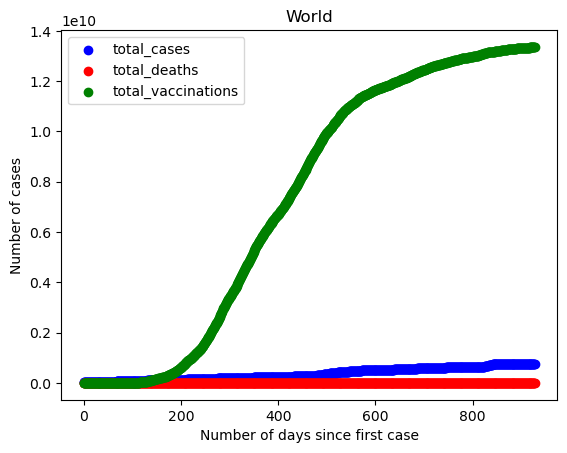

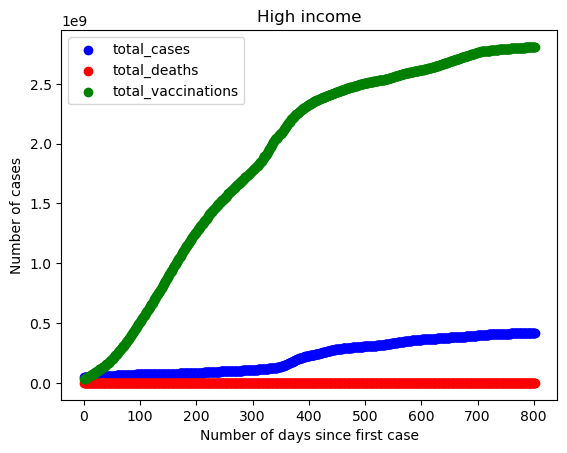

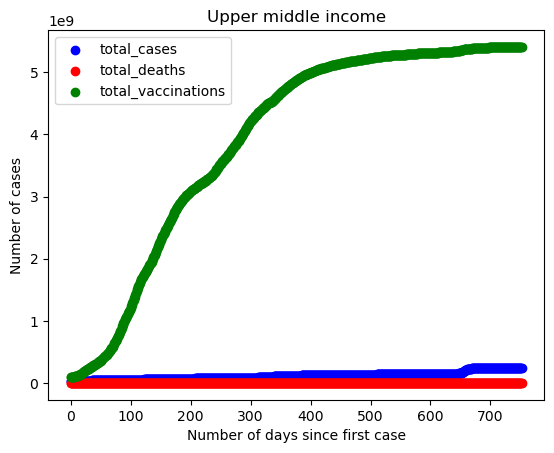

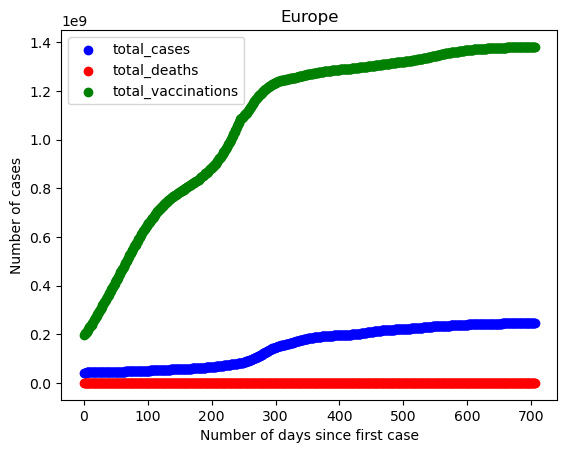

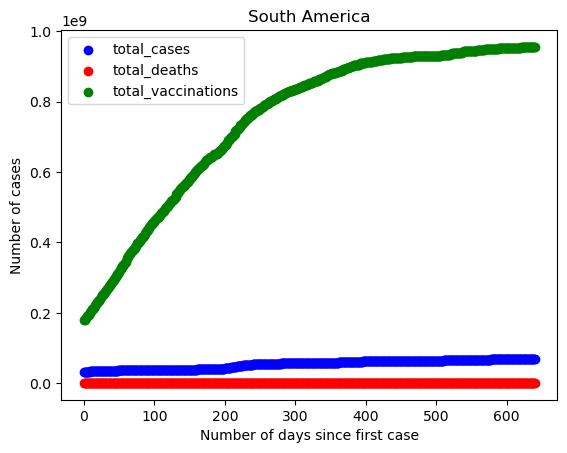

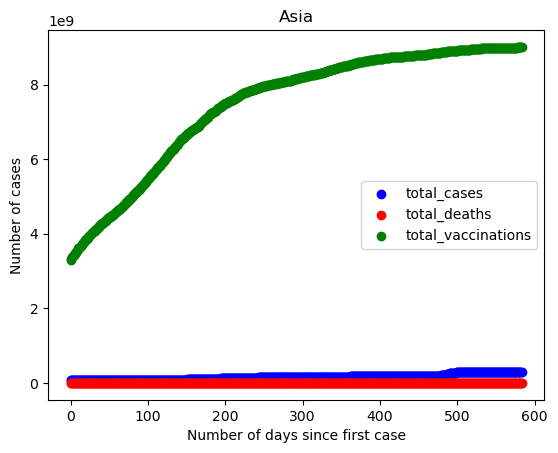

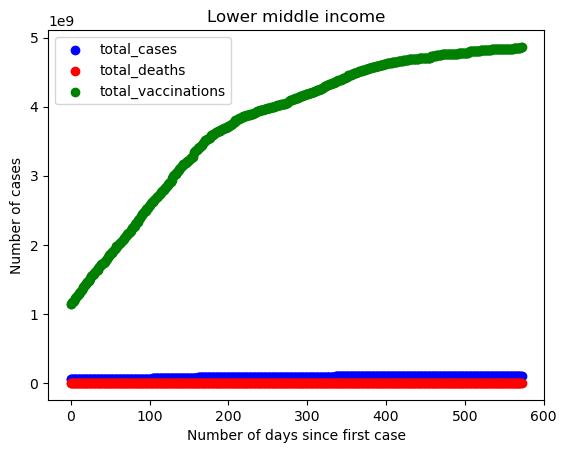

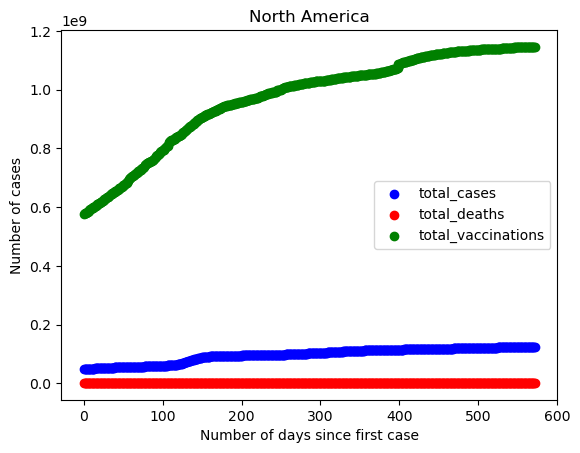

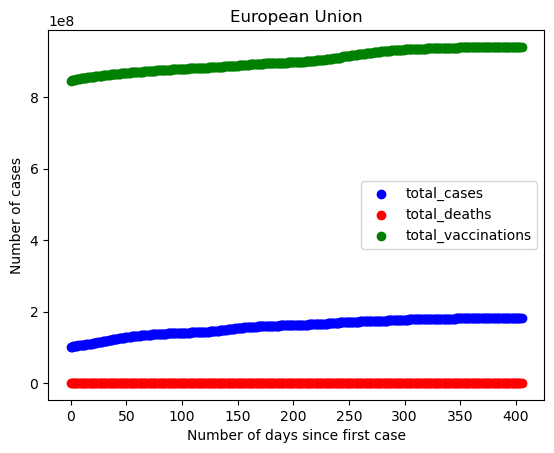

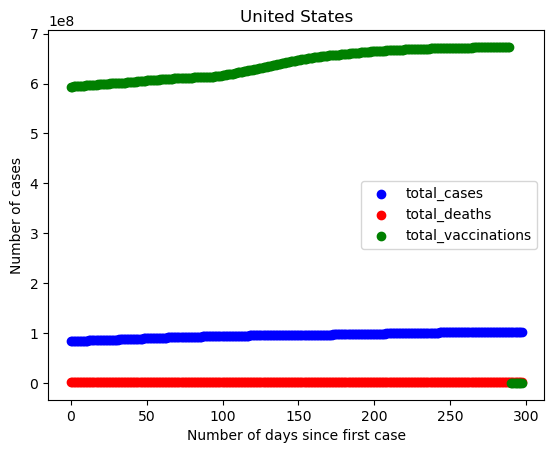

In [66]:
for idx in range(0, len(countries)):
    c = df4[df4['Country'] == countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(c)), c['total_cases'], color='blue', label='total_cases')
    plt.scatter(np.arange(0,len(c)), c['total_deaths'], color='red', label='total_deaths')
    plt.scatter(np.arange(0,len(c)), c['total_vaccinations'], color='green', label='total_vaccinations')
    plt.title(countries[idx])
    plt.xlabel('Number of days since first case')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

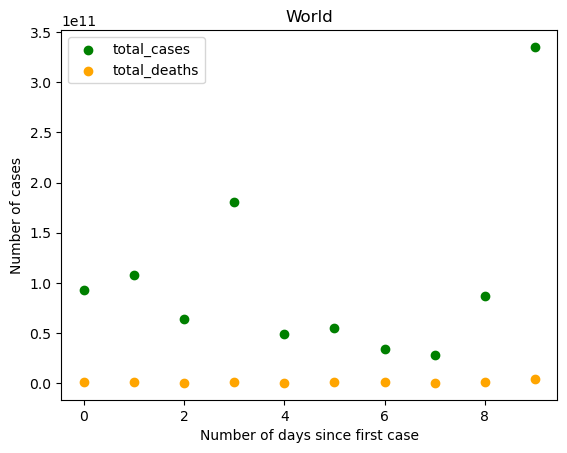

In [67]:
#Grouping by countries

df5 = df4.groupby(['Country'])[['total_cases', 'total_deaths']].sum().reset_index()

c = df5

plt.scatter(np.arange(0,len(c)), c['total_cases'], color='green', label='total_cases')
plt.scatter(np.arange(0,len(c)), c['total_deaths'], color='orange', label='total_deaths')
plt.title('World')
plt.xlabel('Number of days since first case')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

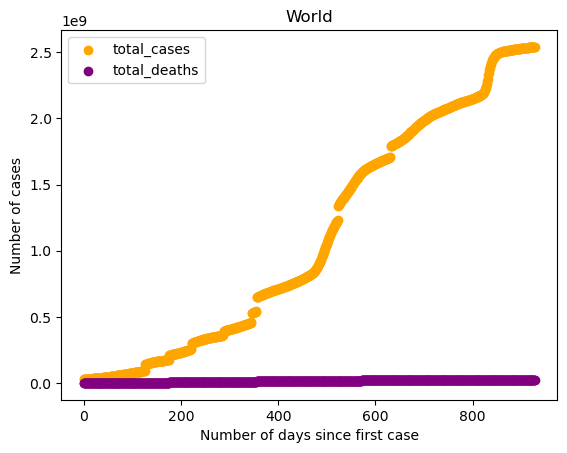

In [69]:
#Grouping by Date where total deaths are greater than 1000000

date = df4['Date'].unique()
df6 = df4.groupby(['Date'])[['total_cases', 'total_deaths']].sum().reset_index()

c = df6

plt.scatter(np.arange(0,len(c)), c['total_cases'], color='orange', label='total_cases')
plt.scatter(np.arange(0,len(c)), c['total_deaths'], color='purple', label='total_deaths')
plt.title('World')
plt.xlabel('Number of days since first case')
plt.ylabel('Number of cases')
plt.legend()
plt.show()

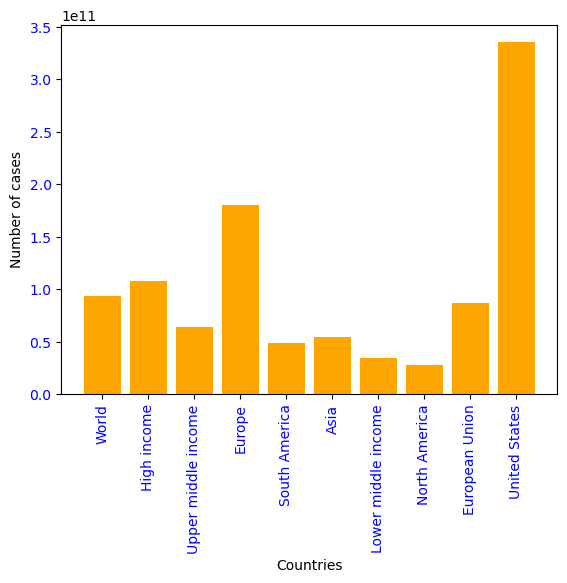

In [132]:
country = list(countries)

total_cases = list(df5['total_cases'])


plt.bar(country, total_cases, color='orange')
plt.xlabel('Countries')
plt.xticks(country, rotation=90, color='blue')
plt.ylabel('Number of cases')
plt.yticks(color='blue')
plt.show()